# Summary Statistics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fitbit_df = pd.read_csv('fitbit_data.csv')

In [22]:
fitbit_df.isnull().sum()

date                  0
AZM_minutes           0
rmssd                 0
nremhr                0
entropy               0
sleep_score           0
deep_sleep_min        0
resting_heart_rate    0
stress_score          0
o2_avg                0
o2_lower_bound        0
o2_upper_bound        0
calories              0
dtype: int64

In [23]:
fitbit_df.describe()

,AZM_minutes,rmssd,nremhr,entropy,sleep_score,deep_sleep_min,resting_heart_rate,stress_score,o2_avg,o2_lower_bound,o2_upper_bound,calories
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,52.370861,66.073924,0.967547,895.769586,80.860927,78.496689,59.271523,78.470199,83.483994,87.114349,97.764238,1889.645232
std,47.350412,13.494883,0.008470,224.159308,6.015579,18.435789,2.818827,5.253326,2.465715,9.302653,1.456953,233.930504
min,1.000000,39.054747,0.939544,483.793301,59.000000,6.000000,51.000000,61.000000,76.932317,62.933333,92.900000,1413.980000
25%,11.500000,56.130634,0.961890,742.451011,78.000000,66.000000,58.000000,76.000000,81.777188,84.875000,97.000000,1725.815000
50%,41.000000,64.243988,0.967833,880.659710,82.000000,80.000000,59.000000,79.000000,83.375523,91.050000,97.900000,1856.860000
75%,79.500000,74.562489,0.972464,1016.575328,85.000000,91.000000,61.000000,82.000000,85.430827,93.675000,98.800000,2049.940000
max,187.000000,110.383053,0.987235,1774.991863,92.000000,119.000000,67.000000,92.000000,90.156170,98.400000,100.000000,2580.260000


# Distributions

Distributions could be obtained from the streamlit website I have previously wrote (Streamlit-EDA).

### special case 1 : AZM_minutes : not normally dstributed -> need transformation

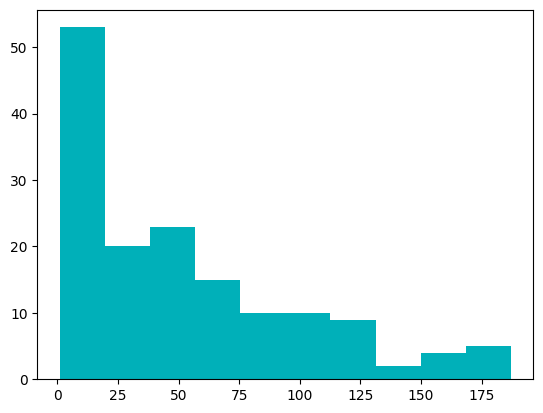

In [8]:
plt.hist(x=fitbit_df['AZM_minutes'], color='#00B0B9')
plt.show()

### special case 2: o2_lower_bound : 2 peaks -> need transformation

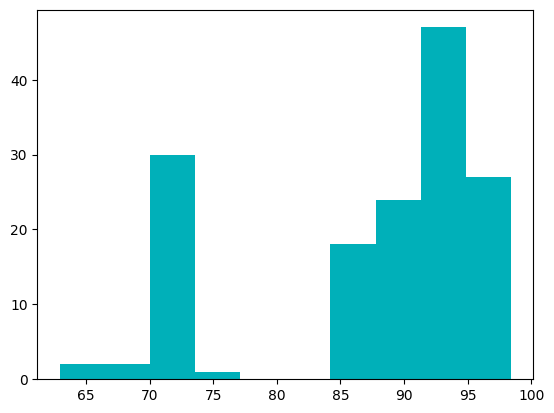

In [10]:
plt.hist(x=fitbit_df['o2_lower_bound'], color='#00B0B9')
plt.show()

### special case 3 : o2_upper_bound, sleep_score, rmssd : not centralized -> need transformation

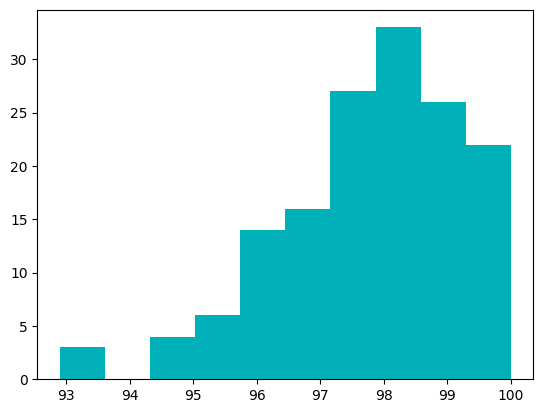

In [12]:
plt.hist(x=fitbit_df['o2_upper_bound'], color='#00B0B9')
plt.show()

### special case 4 : entropy -> need transformation

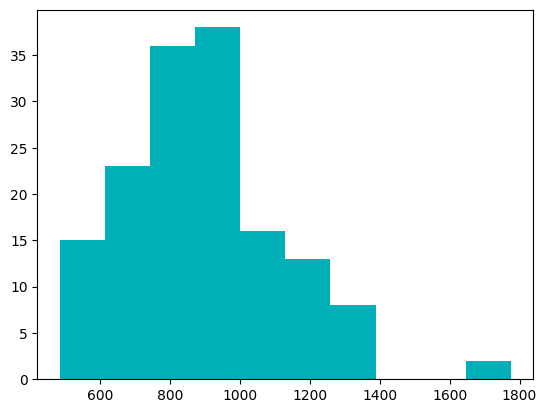

In [13]:
plt.hist(x=fitbit_df['entropy'], color='#00B0B9')
plt.show()

# Correlations

### heat map

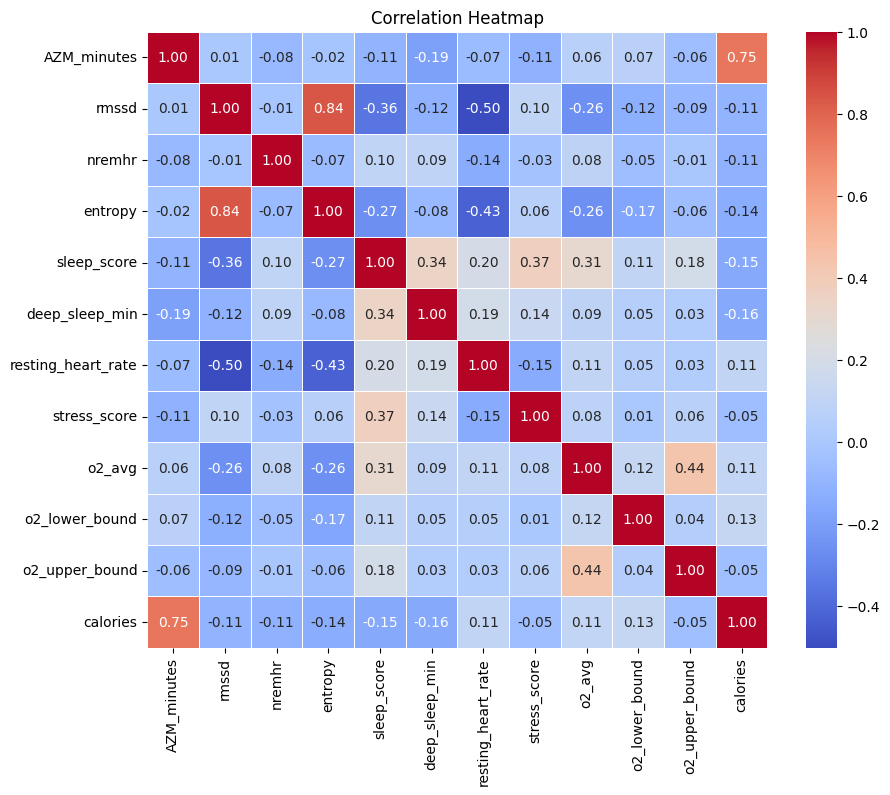

In [24]:
# Exclude the 'date' column from the correlation calculation
correlation_matrix = fitbit_df.drop('date', axis=1).corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Set threshould = 0.5, we will explore more about the  variables that have equal or higher correlations. 

Variables such as rmssd, entropy, resting_heart_rate have relative high correlations and they are all related to cardiac.

Calories and AZM_minutes show the most significant correlation which is around 0.75.

Surprisingly, the correlation between sleep_score and deep_sleep_min is just 0.34. But we will still explore about them. 

In [25]:
threshold = 0.5

high_correlation_pairs = np.where(np.abs(correlation_matrix) >= threshold)

variable_pairs = [(correlation_matrix.index[i], correlation_matrix.columns[j]) for i, j in zip(*high_correlation_pairs) if i != j]

print(f"Variable pairs with correlation greater than {threshold}:")
for pair in variable_pairs:
    print(pair)

Variable pairs with correlation greater than 0.5:
('AZM_minutes', 'calories')
('rmssd', 'entropy')
('rmssd', 'resting_heart_rate')
('entropy', 'rmssd')
('resting_heart_rate', 'rmssd')
('calories', 'AZM_minutes')


### 1. entropy vs. rmssd 

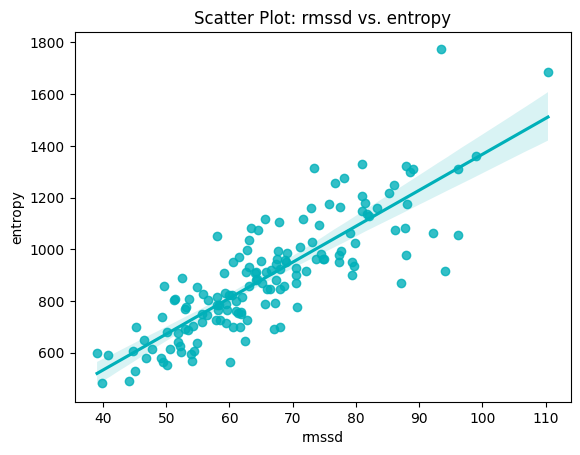

In [31]:
sns.regplot(x='rmssd', y='entropy', data=fitbit_df, color='#00B0B9')
plt.xlabel('rmssd')
plt.ylabel('entropy')
plt.title('Scatter Plot: rmssd vs. entropy')
plt.show()

### 2. resting_heart_rate vs. rmssd

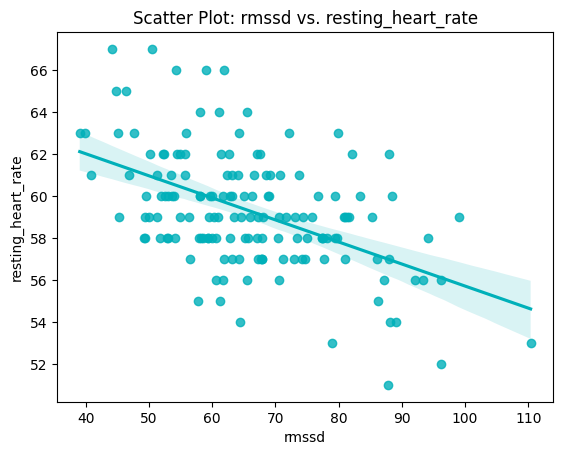

In [33]:
sns.regplot(fitbit_df,x='rmssd', y='resting_heart_rate', color='#00B0B9')
plt.xlabel('rmssd')
plt.ylabel('resting_heart_rate')
plt.title('Scatter Plot: rmssd vs. resting_heart_rate')
plt.show()

### 3. calories vs. AZM_minutes

Text(0.5, 1.0, 'Scatter plot : calories vs. AZM_minutes')

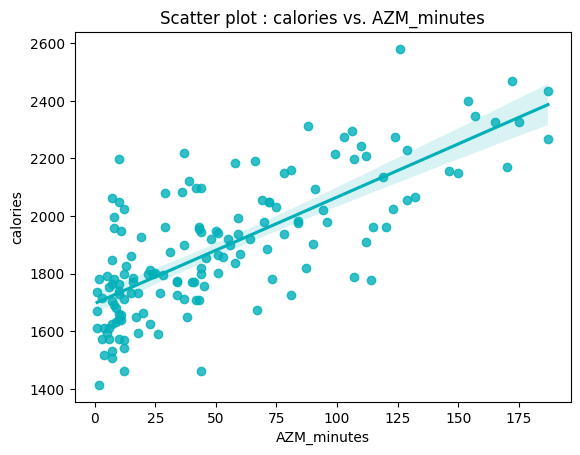

In [35]:
sns.regplot(fitbit_df, x='AZM_minutes', y='calories', color='#00B0B9')
plt.xlabel('AZM_minutes')
plt.ylabel('calories')
plt.title('Scatter plot : calories vs. AZM_minutes')

# Factors Affect deep_sleep_min

### sleep_score vs. deep_sleep_min

The regression line shows a positive relationship between deep_sleep_min and sleep_score. However, there are many data points below the regression line that have relative low sleep_score despite their deep_sleep_min are not. Meanwhile, there are also many data points show high sleep_score whereas their deep_sleep_min is very low.

We need to determine if these are outliers.

Text(0.5, 1.0, 'Scatter Plot : deep_sleep_in vs. sleep_score')

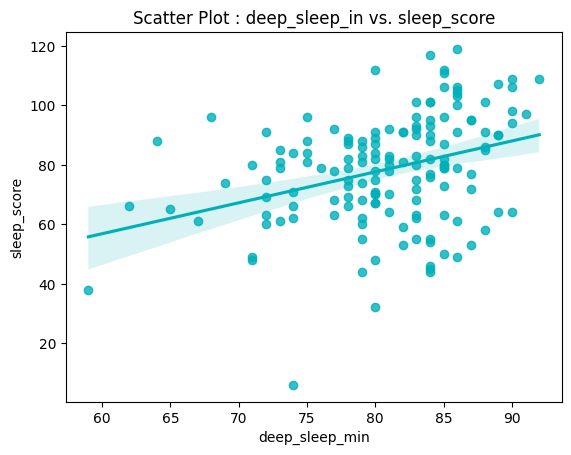

In [40]:
sns.regplot(fitbit_df, x='sleep_score', y='deep_sleep_min', color='#00B0B9')
plt.xlabel('deep_sleep_min')
plt.ylabel('sleep_score')
plt.title('Scatter Plot : deep_sleep_in vs. sleep_score')

### deep_sleep_min vs. AZM_minutes

Text(0.5, 1.0, 'Scatter PLot : deep_sleep_min vs. AZM_minutes')

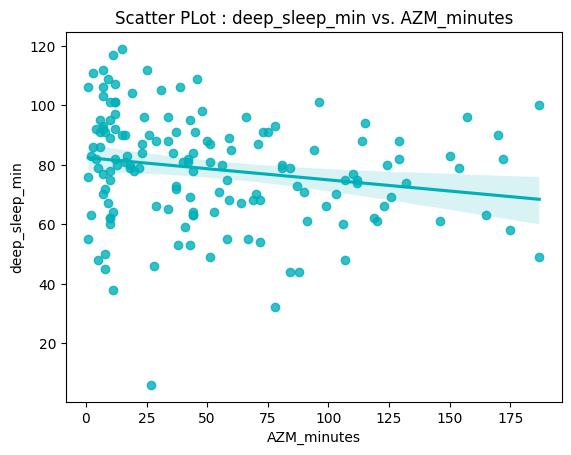

In [39]:
sns.regplot(fitbit_df, x='AZM_minutes', y='deep_sleep_min', color = '#00B0B9')
plt.xlabel('AZM_minutes')
plt.ylabel('deep_sleep_min')
plt.title('Scatter PLot : deep_sleep_min vs. AZM_minutes')

# Factors Affected Calories

### calories vs. AZM_minutes

Text(0.5, 1.0, 'Scatter PLot : calories vs. AZM_minutes')

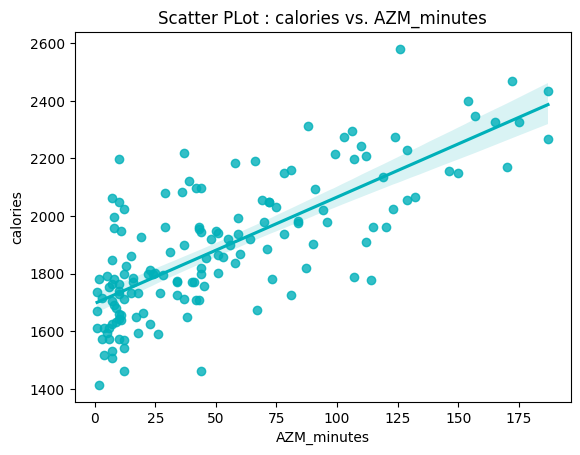

In [3]:
sns.regplot(fitbit_df, x='AZM_minutes', y='calories', color = '#00B0B9')
plt.xlabel('AZM_minutes')
plt.ylabel('calories')
plt.title('Scatter PLot : calories vs. AZM_minutes')

### calories vs. deep_sleep_min

There is no significant relationship between calories burned and deep sleep minutes

Text(0.5, 1.0, 'Scatter PLot : calories vs. deep_sleep_min')

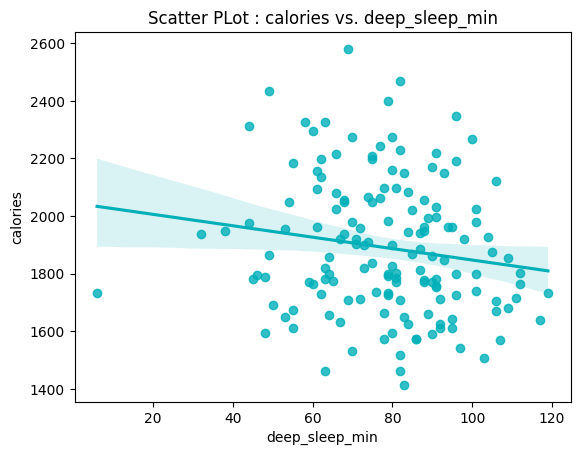

In [4]:
sns.regplot(fitbit_df, x='deep_sleep_min', y='calories', color = '#00B0B9')
plt.xlabel('deep_sleep_min')
plt.ylabel('calories')
plt.title('Scatter PLot : calories vs. deep_sleep_min')

### calories vs. sleep_score

Text(0.5, 1.0, 'Scatter PLot : calories vs. sleep_score')

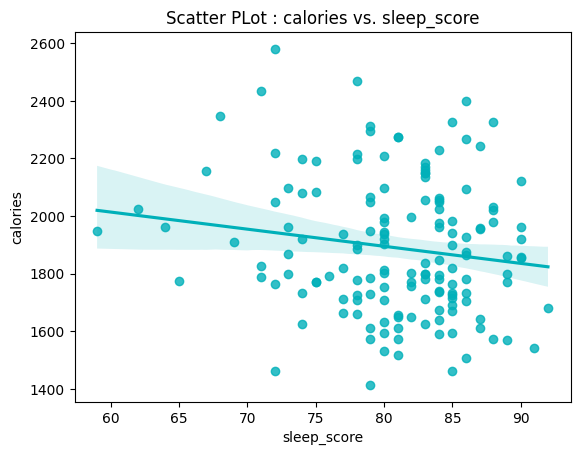

In [5]:
sns.regplot(fitbit_df, x='sleep_score', y='calories', color = '#00B0B9')
plt.xlabel('sleep_score')
plt.ylabel('calories')
plt.title('Scatter PLot : calories vs. sleep_score')